<a href="https://colab.research.google.com/github/lolaoyus/Data-475-Lab-2/blob/master/Copy_of_language_model_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from fastai.text import *

path = "/content/drive/My Drive/DATA-475/imdb"

In [ ]:
# create TextLMDataBunch using the csv in path
#     remember to specify the text column
data_lm = TextLMDataBunch.from_csv(
    path,
    "train.csv",
    text_cols="review"
)

In [ ]:
# create TextClasDataBunch using the csv in path
#     remember to specify the text/label column
#     specify test dataset, vocab, and bs
data_clas = TextClasDataBunch.from_csv(
    path,
    "train.csv",
    test="test.csv",
    text_cols="review",
    label_cols="sentiment",
    vocab=data_lm.train_ds.vocab,
    bs=32,
)

In [ ]:
# create language model learner with AWD_LSTM architecture and drop_mult of 0.5
lm_learner = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=.5)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 4.79E-03


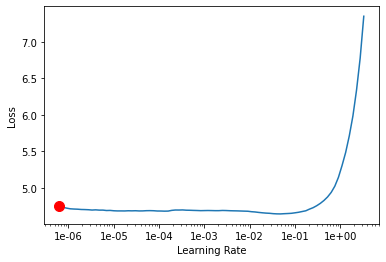

In [ ]:
# find a learing rate
lm_learner.lr_find()
lm_learner.recorder.plot(suggestion=True)

In [ ]:
# fit one cycle
lr = lm_learner.recorder.min_grad_lr
lm_learner.fit_one_cycle(2, lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.705216,4.490042,0.262423,08:19
1,4.680327,4.488707,0.262536,08:27


In [ ]:
# save the encoder
lm_learner.save_encoder("model")

In [ ]:
lm_learner.predict("this movie talks about Canadian", n_words=20)

'this movie talks about Canadian government employees going on the RMS Queen Elizabeth in Britain before it can be crossed with'

In [ ]:
clas_learner = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.5)
clas_learner.load_encoder("model")

RNNLearner(data=TextClasDataBunch;

Train: LabelList (19999 items)
x: TextList
xxbos xxmaj before xxmaj nicholas xxmaj cage was a big action star , he was a great actor . xxmaj this lesser - known movie is where xxmaj cage gives one of his best performances . " xxmaj red xxmaj rock xxmaj west " was a low - budget , almost un - known film , but is one of my favorite movies of all time . i discovered it walking down the video store aisle , and wanted to see xxmaj cage and xxmaj hopper ( xxmaj who also is great in the movie ) appear together . xxmaj go get this one , and i 'm sure you wo n't be disappointed .,xxbos xxmaj this delectable fusion of xxmaj new xxmaj age babble and luridly bad film - making may not " open " you up , to borrow one of the film 's favorite xxunk , but it might leave your jaw slack and your belly sore from laughter or retching . xxmaj based on the best - selling book by xxmaj james xxmaj redfield , first ( self ) published in 1993 , this cornucopia of kitsch track

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 2.51E-02


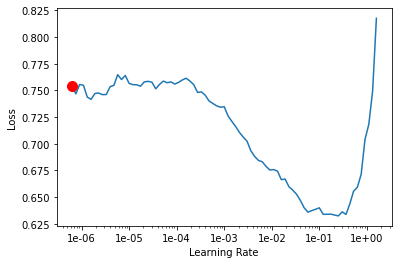

In [ ]:
# tune the text_classifier_learner to accpetable accuracy (>80%)
clas_learner.lr_find()
clas_learner.recorder.plot(suggestion=True)
# lr = clas_learner.recorder.min_grad_lr
# clas_learner.fit_one_cycle(4, lr)

In [ ]:
lr = clas_learner.recorder.min_grad_lr
clas_learner.fit_one_cycle(4, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.755121,0.718399,0.546891,02:41
1,0.736252,0.695773,0.570886,02:30
2,0.709124,0.680813,0.586683,02:30
3,0.710604,0.673737,0.590482,02:31


In [ ]:
clas_learner.predict("This is a horrible movie")

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


(Category tensor(0), tensor(0), tensor([0.8772, 0.1228]))

In [ ]:
clas_learner.predict("This is a great movie,")

(Category tensor(0), tensor(0), tensor([0.6051, 0.3949]))

In [ ]:
# Check the label mapping
# suppose it returns {'negative': 0, 'positive': 1}
data_clas.train_ds.y.c2i

{'negative': 0, 'positive': 1}

In [ ]:
import pandas as pd


df = pd.read_csv(path+"/test.csv")
y_true = tensor(df["sentiment"]=="positive")

In [ ]:
y_true

tensor([ True,  True,  True,  ..., False, False, False])

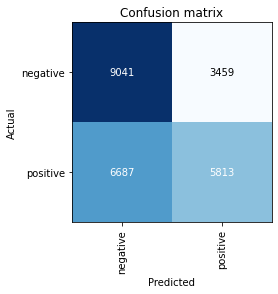

In [ ]:
interp = TextClassificationInterpretation.from_learner(
    clas_learner, 
    ds_type=DatasetType.Test
)
interp.y_true = tensor(df["sentiment"]=="positive")
interp.plot_confusion_matrix()

In [ ]:
from fastai.metrics import accuracy

accuracy(interp.preds, interp.y_true)

tensor(0.5942)